# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, I will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

I begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that I will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.88s)
creating index...
index created!
loading annotations into memory...
Done (t=0.60s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, I plot a random image from the dataset, along with its five corresponding captions.

In subsequent notebooks, I will use this dataset to train my own model to generate captions from images.

http://images.cocodataset.org/val2014/COCO_val2014_000000400367.jpg


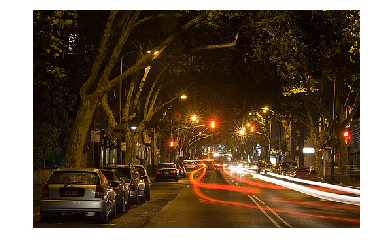

The car lights are streaking by on the street.
A picture taken at slow shutter speed on a city street at night.
Several cars parked on a street near trees.
A city at night with cars driving by on a street. 
A city street lined with parked cars at night.


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: Coming up...

In the following notebooks, I will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  <br><br>The image below illustrates the pipeline followed by an image through a CNN, into an embedded image feature vector, and into an RNN where Long-Short-Term Memory cells retain the state of a word's probability as a likely element of a caption for the input image.

<img src="files/images/encoder-decoder.png"/>